In [579]:
# Create Machine Learning Model from stock metric data

# Import necessary libraries & modules


import pandas as pd
import csv
import math
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
import seaborn as sb


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression


In [580]:
# Import .csv file 
# Create DataFrame from .csv file

file = pd.read_csv('/Users/garrettwankel/PycharmProjects/New/Final_df.csv')
df = pd.DataFrame(file)



In [581]:
# Examine DataFrame

df.head()



,,Sym,SP,50-Day MA,200-Day MA,52W Range,MC,P/B,Vol,Avg Vol (3m),Avg Vol (10-day),Sh Out,Float,Insiders,Institutions
0,08-07-2020,crbp,6.61,7.35,6.36,3.29 - 8.78,560.17M,24.43,"1,324,087",1.58M,1.84M,72.49M,71.03M,4.93%,41.18%
1,08-07-2020,ccxi,55.24,56.30,50.83,6.37 - 65.43,3.75B,62.41,"366,281",732.02k,624.86k,67.83M,43.42M,28.93%,67.08%
2,08-07-2020,gwph,109.37,129.58,113.69,67.98 - 172.12,3.81B,5.87,"2,374,243",339.43k,271.39k,31.08M,30.43M,1.12%,83.33%
3,08-07-2020,imvt,27.16,25.17,19.53,8.34 - 29.96,2.11B,22.46,"253,162",427.77k,236.06k,81.81M,25.48M,73.18%,21.10%
4,08-07-2020,alny,143.53,153.62,131.42,73.32 - 167.33,16.55B,14.08,"344,523",769.09k,470.09k,114.82M,113.87M,0.80%,94.74%


In [582]:
# Rename column(s)

df.rename(columns={' ': 'Date'}, inplace=True)



In [583]:
# Examine datatypes to understand what needs to be converted to numerical values

df.dtypes



Date                 object
Sym                  object
SP                  float64
50-Day MA           float64
200-Day MA          float64
52W Range            object
MC                   object
P/B                 float64
Vol                  object
Avg Vol (3m)         object
Avg Vol (10-day)     object
Sh Out               object
Float                object
Insiders             object
Institutions         object
dtype: object

In [584]:
# Subset DataFrame for ML model implementation
# Reset index of Subset

df2 = df[df['Sym'] == 'ccxi']
df2.reset_index(inplace=True)



In [585]:
# Remove non-numerical characters from featured columns for uniformity
# Convert object .dtype to float

df2['Vol'] = df2.replace(',', '', regex=True)
df2['Avg Vol (10-day)'] = df2.replace('k', '', regex=True)
df2[['Vol', 'Avg Vol (10-day)']] = df2[['Vol', 'Avg Vol (10-day)']].astype(float)
df2.dtypes



/Users/garrettwankel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/garrettwankel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/garrettwankel/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

index                 int64
Date                 object
Sym                  object
SP                  float64
50-Day MA           float64
200-Day MA          float64
52W Range            object
MC                   object
P/B                 float64
Vol                 float64
Avg Vol (3m)         object
Avg Vol (10-day)    float64
Sh Out               object
Float                object
Insiders             object
Institutions         object
dtype: object

In [586]:
# Define features variables

X = df2[['50-Day MA', '200-Day MA', 'Vol', 'Avg Vol (10-day)']]

y = df2['SP']




In [587]:
y.shape, X.shape

((22,), (22, 4))

In [588]:
# Split dataset into train & test, specify test_size
X = np.array(X)
X = preprocessing.scale(X)
y = np.array(y)

train_X, test_x, train_y, test_y = train_test_split(X, y, test_size=.25, random_state=10)



In [589]:
# Create function to determine best 'max_leaf_nodes' value for each model
# Create for loop to iterate through list of possible values
# Print 'max_leaf_nodes' with corresponding 'mean_absolute_error'

def get_mae(max_leaf_nodes, train_X, test_x, train_y, test_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes)
    model2 = RandomForestRegressor(max_leaf_nodes=max_leaf_nodes)
    model3 = LinearRegression()
    model.fit(train_X, train_y)
    model2.fit(train_X, train_y)
    model3.fit(train_X, train_y)
    preds1 = model.predict(test_x)
    preds2 = model2.predict(test_x)
    preds3 = model2.predict(test_x)
    mae1 = mean_absolute_error(preds1, test_y)
    mae2 = mean_absolute_error(preds2, test_y)
    mae3 = mean_absolute_error(preds3, test_y)
    return(mae1, mae2, mae3)

for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, test_x, train_y, test_y)
    print(max_leaf_nodes, my_mae)
    
    

5 (0.910555555555554, 0.7112541726791667, 0.7112541726791667)
50 (0.6149999999999984, 0.7029000000000458, 0.7029000000000458)
500 (1.629999999999999, 0.6957833333333632, 0.6957833333333632)
5000 (1.5683333333333327, 0.7771000000000304, 0.7771000000000304)


In [590]:
# Create models for predicting
# Train models

model = DecisionTreeRegressor(max_leaf_nodes=50)
model2 = RandomForestRegressor(max_leaf_nodes=50, n_estimators=200, criterion='mae')
model3 = LinearRegression()
model.fit(train_X,train_y)
model2.fit(train_X, train_y)
model3.fit(train_X, train_y)


LinearRegression()

In [591]:
# Make predictions

preds1 = model.predict(test_x)
preds2 = model2.predict(test_x)
preds3 = model3.predict(test_x)


In [592]:
# Score each model to determine it's accuracy based on the returned coeeficient

print(model.score(test_x, test_y))
print(model2.score(test_x, test_y))
print(model3.score(test_x, test_y))

0.7757533570767252
0.83322420077244
0.713827208427692


In [593]:
# Find the 'mean abosolute error' of each model
# ** Helpful to determine how accurate model is **

mae1 = mean_absolute_error(preds1, test_y)
mae2 = mean_absolute_error(preds2, test_y)
mae3 = mean_absolute_error(preds3, test_y)


In [594]:
# Print 'mean aboslute error'

print(mae1)
print(mae2)
print(mae3)


0.9299999999999985
0.7584250000000511
1.0582202918613117


In [595]:
# Print True values and corresponding predictions to compare models

test_y, preds1, preds2, preds3



(array([51.31, 54.14, 53.66, 52.86, 54.6 , 48.07]),
 array([52.37, 52.2 , 52.99, 52.05, 54.19, 47.38]),
 array([51.7065 , 52.94605, 53.54875, 52.44595, 53.7027 , 49.6075 ]),
 array([52.10105903, 52.33042661, 53.78666702, 51.89896195, 53.48006344,
        49.61104771]))

In [596]:
score = cross_val_score(model, X, y, cv=5)
score

array([ -0.15632369,  -7.84168138, -72.02915866,  -3.83086179,
        -2.28001085])

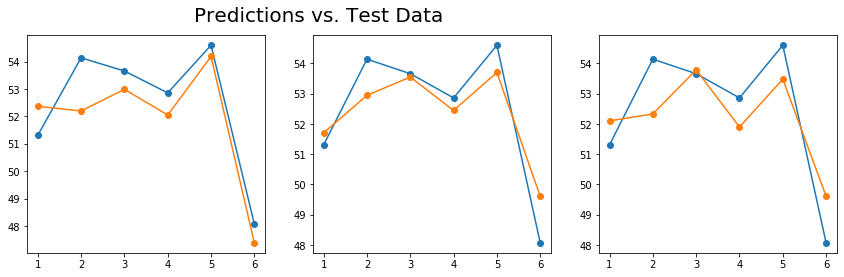

In [597]:
#plt.figure(figsize=(25,12))
#plt.plot(test_y)
#plt.plot(preds1)
#plt.plot(preds2)
#plt.plot(preds3)

plot_margin = 0.25
x = [1,2,3,4,5,6]
fig, axs = plt.subplots(1,3)

axs[0].plot(x, test_y, x, preds1, marker='o')
plt.suptitle(t='Predictions vs. Test Data', x=0.8, fontsize=20, linespacing=10)
axs[1].plot(x, test_y, x, preds2, marker='o')
axs[2].plot(x, test_y, x, preds3, marker='o')
fig.subplots_adjust(right=2)

plt.show()

red = mpatches.Patch(color='red', label='Test data')
blue = mpatches.Patch(color='blue', label='DCR')
green = mpatches.Patch(color='green', label='RF')
orange = mpatches.Patch(color='orange', label='LR')
#plt.legend(handles=[red, blue, green, orange])
#plt.show()
